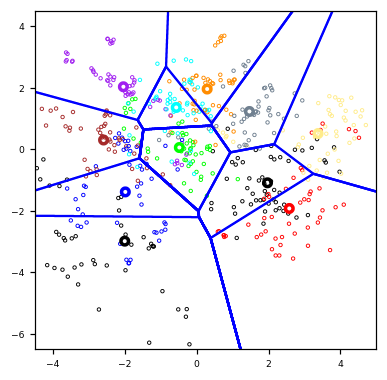

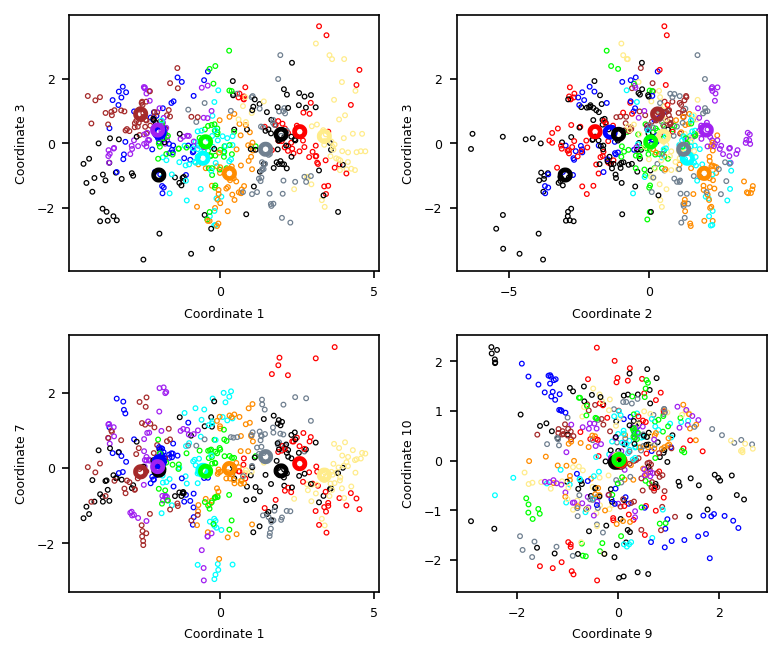

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load training data
url = 'https://raw.githubusercontent.com/mumer97/Stats/main/DataVowel'
df = pd.read_csv(url,index_col=0)
df.y = df.y - 1
df.head()

#LDA
Features = [f'x.{i+1}' for i in range(10)]
df_train, df_test = df[df.is_train == 1], df[df.is_train == 0]
X_train, y_train = df_train[Features].values, df_train.y.values

LDA = LinearDiscriminantAnalysis(n_components=10).fit(X_train, y_train)

X_reduced = LDA.transform(X_train)
means = LDA.transform(LDA.means_)

colors = np.array([ '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF','#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])

def plot_projections(ax, i, j):
    ax.scatter(X_reduced[:, i], X_reduced[:, j], facecolors='none',
               edgecolors=colors[y_train], s=5, linewidth=0.6)
    ax.scatter(means[:, i], means[:, j], facecolors='none', edgecolors=colors,
               s=5, linewidth=5)
    for t in ax.get_yticklabels() + ax.get_xticklabels():
        t.set_fontsize(6)
    ax.set_xlabel(f'Coordinate {i+1}',  fontsize=6)
    ax.set_ylabel(f'Coordinate {j+1}',  fontsize=6)

LDA = LinearDiscriminantAnalysis().fit(X_reduced[:, :2], y_train)

grid_size = 2000
X = np.transpose([np.tile(np.linspace(-4.5, 5, grid_size), grid_size),
                  np.repeat(np.linspace(-6.5, 4.5, grid_size), grid_size)])
y = LDA.predict(X)
X0 = X[:, 0].reshape(grid_size, grid_size)
X1 = X[:, 1].reshape(grid_size, grid_size)

fig, ax = plt.subplots(figsize=(4, 4), dpi=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], facecolors='none',
           edgecolors=colors[y_train], s=5, linewidth=0.6)
ax.scatter(means[:, 0], means[:, 1], facecolors='none', edgecolors=colors,
           s=5, linewidth=5)
for i in ax.get_yticklabels() + ax.get_xticklabels():i.set_fontsize(6)

#DB
_ = ax.contour(X0, X1, y.reshape(grid_size, grid_size), np.linspace(0, 9, 10)+0.5, colors='blue')
np.linspace

fig, axarr = plt.subplots(2, 2, figsize=(6, 5), dpi=150)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plot_projections(axarr[0, 0], 0, 2)
plot_projections(axarr[0, 1], 1, 2)
plot_projections(axarr[1, 0], 0, 6)
plot_projections(axarr[1, 1], 8, 9)

In [2]:
# Accuracy for Problem 4
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Load data
url = 'https://raw.githubusercontent.com/mumer97/Stats/main/DataVowel'
df = pd.read_csv(url, index_col=0)
df.y = df.y - 1

# Split data into training and testing sets
features = [f'x.{i+1}' for i in range(10)]
X_train, X_test, y_train, y_test = train_test_split(df[features], df.y, test_size=0.25, random_state=15)

# Train LDA model
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

# Make predictions on test set
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.592741935483871


In [3]:
# Linear Regression for Problem 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# load the vowel dataset
url = 'https://raw.githubusercontent.com/mumer97/Stats/main/DataVowel'
data = np.loadtxt(url, delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# train a linear regression model on the features
reg = LinearRegression()
reg.fit(X, y)

# make predictions on the training data
y_pred = reg.predict(X)

# threshold the predictions to obtain class labels
y_pred_class = np.round(y_pred)

# report the classification accuracy
accuracy = accuracy_score(y, y_pred_class)
print('Classification Accuracy | Linear Regression:', accuracy)

Classification Accuracy | Linear Regression: 0.6828282828282828


In [4]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the vowel dataset
url = 'https://raw.githubusercontent.com/mumer97/Stats/main/DataVowel'
data = np.loadtxt(url, delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# train a logistic regression model on the features
clf = LogisticRegression(random_state=0)
clf.fit(X, y)

# make predictions on the training data
y_pred = clf.predict(X)

# report the classification accuracy
accuracy = accuracy_score(y, y_pred)
print('Classification accuracy | Logistic Regression:', accuracy)

Classification accuracy | Logistic Regression: 0.6757575757575758


C:\Users\Usman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
